In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Train Data**

In [2]:
train_csv = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')
train_csv.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [3]:
train_csv.shape

(106800, 15)

In [4]:
train_csv.dtypes

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                     object
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object

**We have only one variable which is categorical, while all others are numerical.**

In [5]:
train_csv.isna().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

**We don't have any null values**

In [6]:
train_csv['expert_consensus'].unique()

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

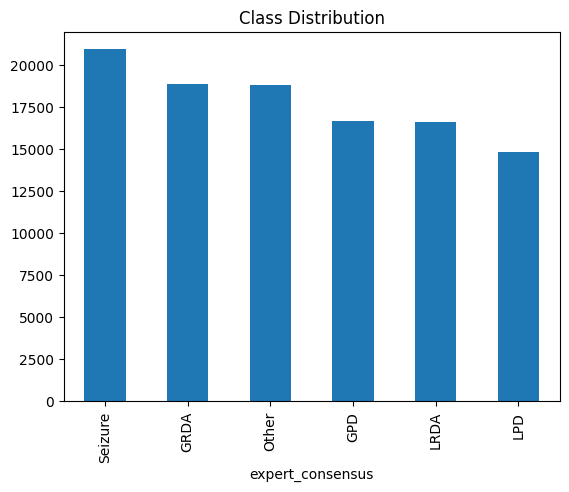

In [7]:
train_csv['expert_consensus'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [8]:
# percentage of class distribution
train_csv['expert_consensus'].value_counts()/len(train_csv['expert_consensus'])*100

expert_consensus
Seizure    19.600187
GRDA       17.660112
Other      17.610487
GPD        15.638577
LRDA       15.580524
LPD        13.910112
Name: count, dtype: float64

**The distribution of each class is almost equal. Hence, we have a balanced dataset**

In [9]:
# Number of unique patients
print(f"Number of unique patients in train dataset: {train_csv['patient_id'].nunique()}")

# Number of unique EEG IDs
print(f"Number of unique EEG IDs in train dataset: {train_csv['eeg_id'].nunique()}")

Number of unique patients in train dataset: 1950
Number of unique EEG IDs in train dataset: 17089


<Axes: >

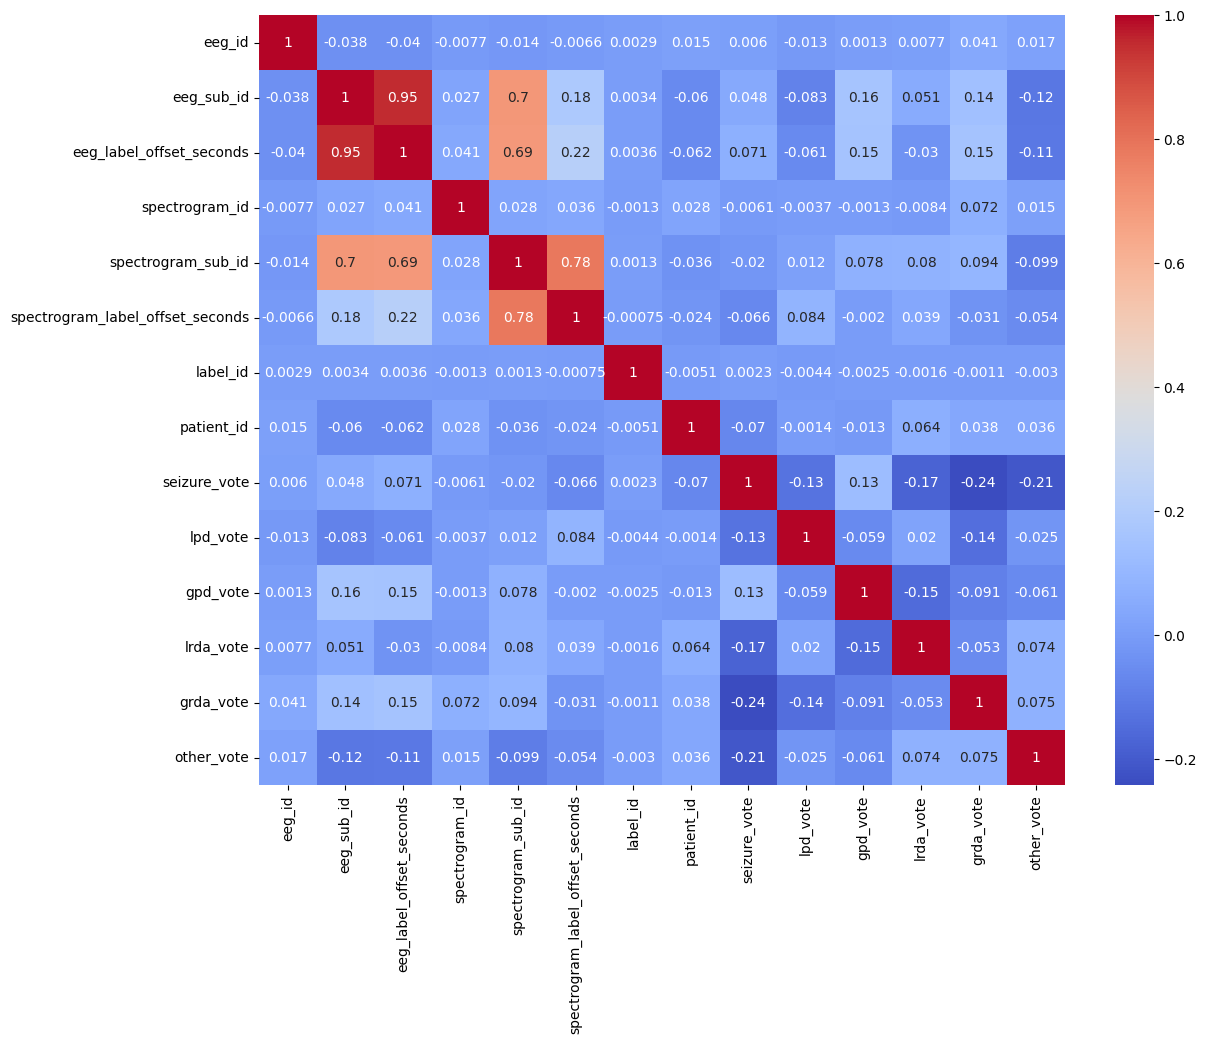

In [10]:
numerical_columns = train_csv.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(13,10))
sns.heatmap(train_csv[numerical_columns].corr(), annot = True, cmap='coolwarm')

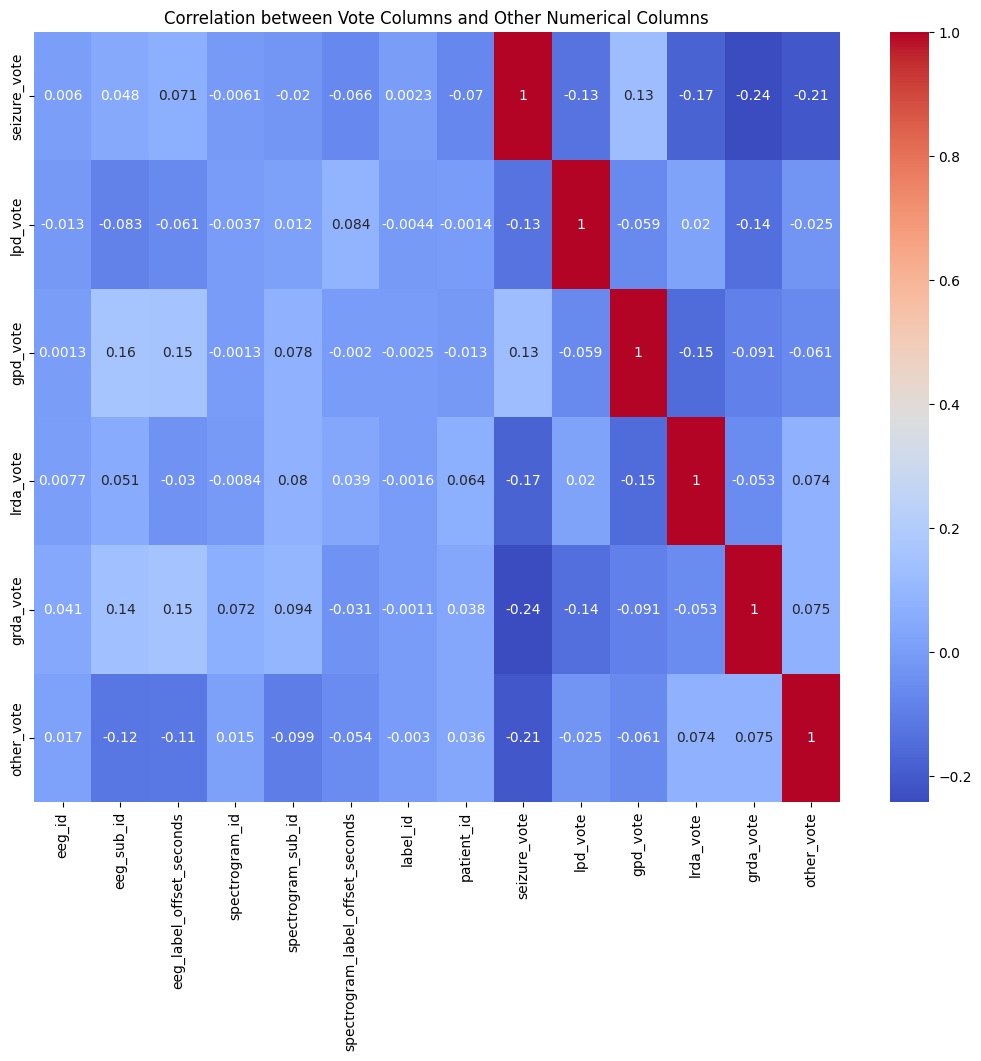

In [11]:
# Correlation with vote columns
plt.figure(figsize=(13, 10))
vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

# Select only numerical columns for correlation, including the specific vote columns
numerical_columns = train_csv.select_dtypes(include=['int64', 'float64']).columns
selected_columns = [col for col in numerical_columns if col in vote_columns or col not in vote_columns]
corr_matrix = train_csv[selected_columns].corr()

corr_matrix_votes = corr_matrix.loc[vote_columns, :]

sns.heatmap(corr_matrix_votes, annot=True, cmap='coolwarm')
plt.title('Correlation between Vote Columns and Other Numerical Columns')
plt.show()

* High positive correlations between eeg_sub_id, eeg_label_offset_seconds, spectrogram_sub_id, and spectrogram_label_offset_seconds imply these variables are related or derived from one another.
* The patient_id shows low correlation values with other variables, indicating that the patient identifiers have a negligible linear relationship with EEG or spectrogram characteristics.
* The votes for different EEG events (seizure_vote, lpd_vote, etc.) do not show significant correlations with eeg_id or spectrogram_id, which suggests that these votes are independent of the EEG or spectrogram identifiers and are more closely related to the actual EEG event occurrences.

In [12]:
train1 = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/test_spectrograms/853520.parquet', engine='pyarrow')
train1

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,14.910000,17.110001,11.660000,11.73,6.08,4.54,4.31,3.38,2.05,...,0.07,0.06,0.05,0.06,0.05,0.05,0.06,0.05,0.04,0.05
1,3,11.130000,10.950000,10.770000,5.07,4.03,3.24,3.61,2.98,1.54,...,0.05,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.02
2,5,10.880000,10.570000,8.790000,5.33,2.44,1.48,1.83,0.99,0.89,...,0.04,0.04,0.04,0.03,0.03,0.04,0.04,0.05,0.06,0.06
3,7,19.450001,18.200001,17.719999,13.38,4.17,1.88,1.84,1.22,1.27,...,0.03,0.03,0.05,0.08,0.07,0.07,0.08,0.03,0.03,0.03
4,9,21.650000,22.530001,23.160000,17.00,7.19,3.89,3.65,2.72,2.35,...,0.04,0.04,0.05,0.05,0.06,0.05,0.05,0.05,0.04,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,591,15.580000,18.209999,14.020000,15.96,4.36,4.98,2.68,2.22,2.03,...,0.48,0.59,0.59,0.73,0.44,0.41,0.56,0.60,0.61,0.60
296,593,17.209999,20.219999,20.889999,17.16,9.15,4.14,2.49,2.71,1.60,...,0.26,0.37,0.41,0.36,0.48,0.36,0.39,0.46,0.34,0.32
297,595,9.610000,13.320000,9.190000,11.50,8.11,5.53,5.57,3.69,3.19,...,0.58,0.37,0.17,0.14,0.13,0.30,0.36,0.39,0.56,0.29
298,597,8.430000,11.840000,13.640000,10.56,8.63,5.80,2.98,1.48,0.96,...,0.54,0.22,0.17,0.16,0.11,0.38,0.45,0.45,0.45,0.34


## **Electroencephalogram (EEG) Data**

In [13]:
eeg = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/test_eegs/3911565283.parquet')
eeg

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,9.210000,-47.459999,15.100000,8.220000,-16.900000,-22.99,-25.820000,-10.090000,28.370001,-3.010000,-27.299999,101.040001,35.110001,14.540000,18.330000,28.540001,44.090000,69.650002,30.74,171.679993
1,-3.590000,-30.290001,32.380001,10.800000,-68.980003,-21.60,-15.080000,-9.210000,26.360001,-8.980000,-32.279999,95.800003,26.389999,4.820000,10.540000,20.559999,32.060001,59.439999,23.32,178.279999
2,-26.040001,-60.070000,2.370000,-10.150000,-34.689999,-31.40,-31.920000,-26.980000,-1.940000,-28.770000,-49.770000,73.449997,-3.680000,-17.320000,-16.150000,-8.270000,5.330000,45.180000,9.49,306.739990
3,-3.040000,-36.250000,29.559999,14.530000,-14.010000,-11.90,-14.230000,-6.310000,26.040001,-2.770000,-25.030001,91.010002,22.610001,6.900000,9.930000,15.480000,33.580002,69.620003,31.01,223.259995
4,-4.630000,-20.160000,25.190001,1.190000,-44.580002,-23.51,-30.709999,-17.600000,25.420000,-8.860000,-33.959999,89.449997,19.440001,-2.080000,6.110000,8.380000,24.180000,55.869999,19.91,170.759995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-26.889999,-45.480000,-17.250000,-23.570000,19.059999,-9.40,-27.120001,-21.580000,-75.760002,-65.800003,-88.790001,-30.090000,-49.830002,-75.339996,-61.139999,-71.889999,-53.299999,-8.130000,-12.38,-34.799999
9996,-24.049999,-41.689999,-13.450000,-26.219999,14.210000,0.02,-30.030001,-22.219999,-75.440002,-68.639999,-91.099998,-33.180000,-45.610001,-78.809998,-61.259998,-71.889999,-55.009998,-12.320000,-15.15,-27.799999
9997,-34.500000,-55.340000,-25.959999,-30.670000,8.890000,-9.74,-38.520000,-30.330000,-87.080002,-70.690002,-92.320000,-37.349998,-57.290001,-80.209999,-67.320000,-72.919998,-57.110001,-12.330000,-15.20,21.980000
9998,-16.110001,-35.980000,-8.570000,-12.020000,28.580000,5.45,-20.510000,-10.300000,-65.459999,-50.730000,-71.650002,-15.970000,-36.380001,-59.660000,-46.310001,-51.520000,-39.740002,6.770000,3.74,-5.800000


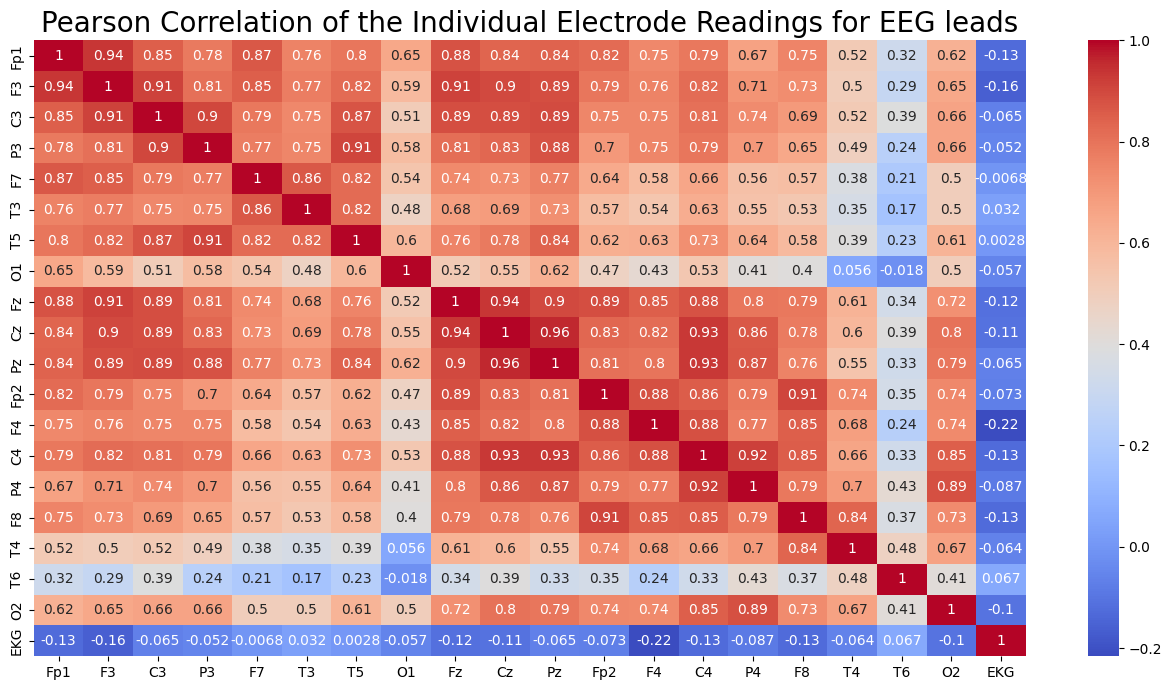

In [14]:
# Correlation Analysis
corr_matrix = eeg.corr()

# Increase the size of the figure
plt.figure(figsize=(16, 8)) 

# Heatmap for correlation analysis
# We are using 'coolwarm' colormap here to distinguish positive and negative correlations easily
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Pearson Correlation of the Individual Electrode Readings for EEG leads', fontsize=20)
plt.show()

In [15]:
from scipy.stats import skew, kurtosis

def calculate_time_domain_features(eeg_data):
    """
    Calculate time domain features for each channel in the EEG data.

    Parameters:
    eeg_data (pandas.DataFrame): A DataFrame with each column representing an EEG channel.

    Returns:
    pandas.DataFrame: A DataFrame with time domain features for each channel.
    """
    features_dict = {}

    # Calculate features for each channel
    for column in eeg_data.columns:
        features_dict[f'{column}_mean'] = [eeg_data[column].mean()]
        features_dict[f'{column}_std'] = [eeg_data[column].std()]
        features_dict[f'{column}_max'] = [eeg_data[column].max()]
        features_dict[f'{column}_min'] = [eeg_data[column].min()]
        features_dict[f'{column}_skewness'] = [skew(eeg_data[column])]
        features_dict[f'{column}_kurtosis'] = [kurtosis(eeg_data[column])]

    # Create a DataFrame from the dictionary
    features_df = pd.DataFrame(features_dict)

    return features_df

time_domain_features = calculate_time_domain_features(eeg)
time_domain_features

,Fp1_mean,Fp1_std,Fp1_max,Fp1_min,Fp1_skewness,Fp1_kurtosis,F3_mean,F3_std,F3_max,F3_min,...,O2_max,O2_min,O2_skewness,O2_kurtosis,EKG_mean,EKG_std,EKG_max,EKG_min,EKG_skewness,EKG_kurtosis
0,-19.990791,40.272881,172.289993,-132.449997,1.037303,1.693018,-33.769501,33.420719,133.210007,-135.789993,...,149.039993,-122.910004,0.113879,1.327361,27.237782,79.594276,367.429993,-400.309998,-0.008839,2.285033


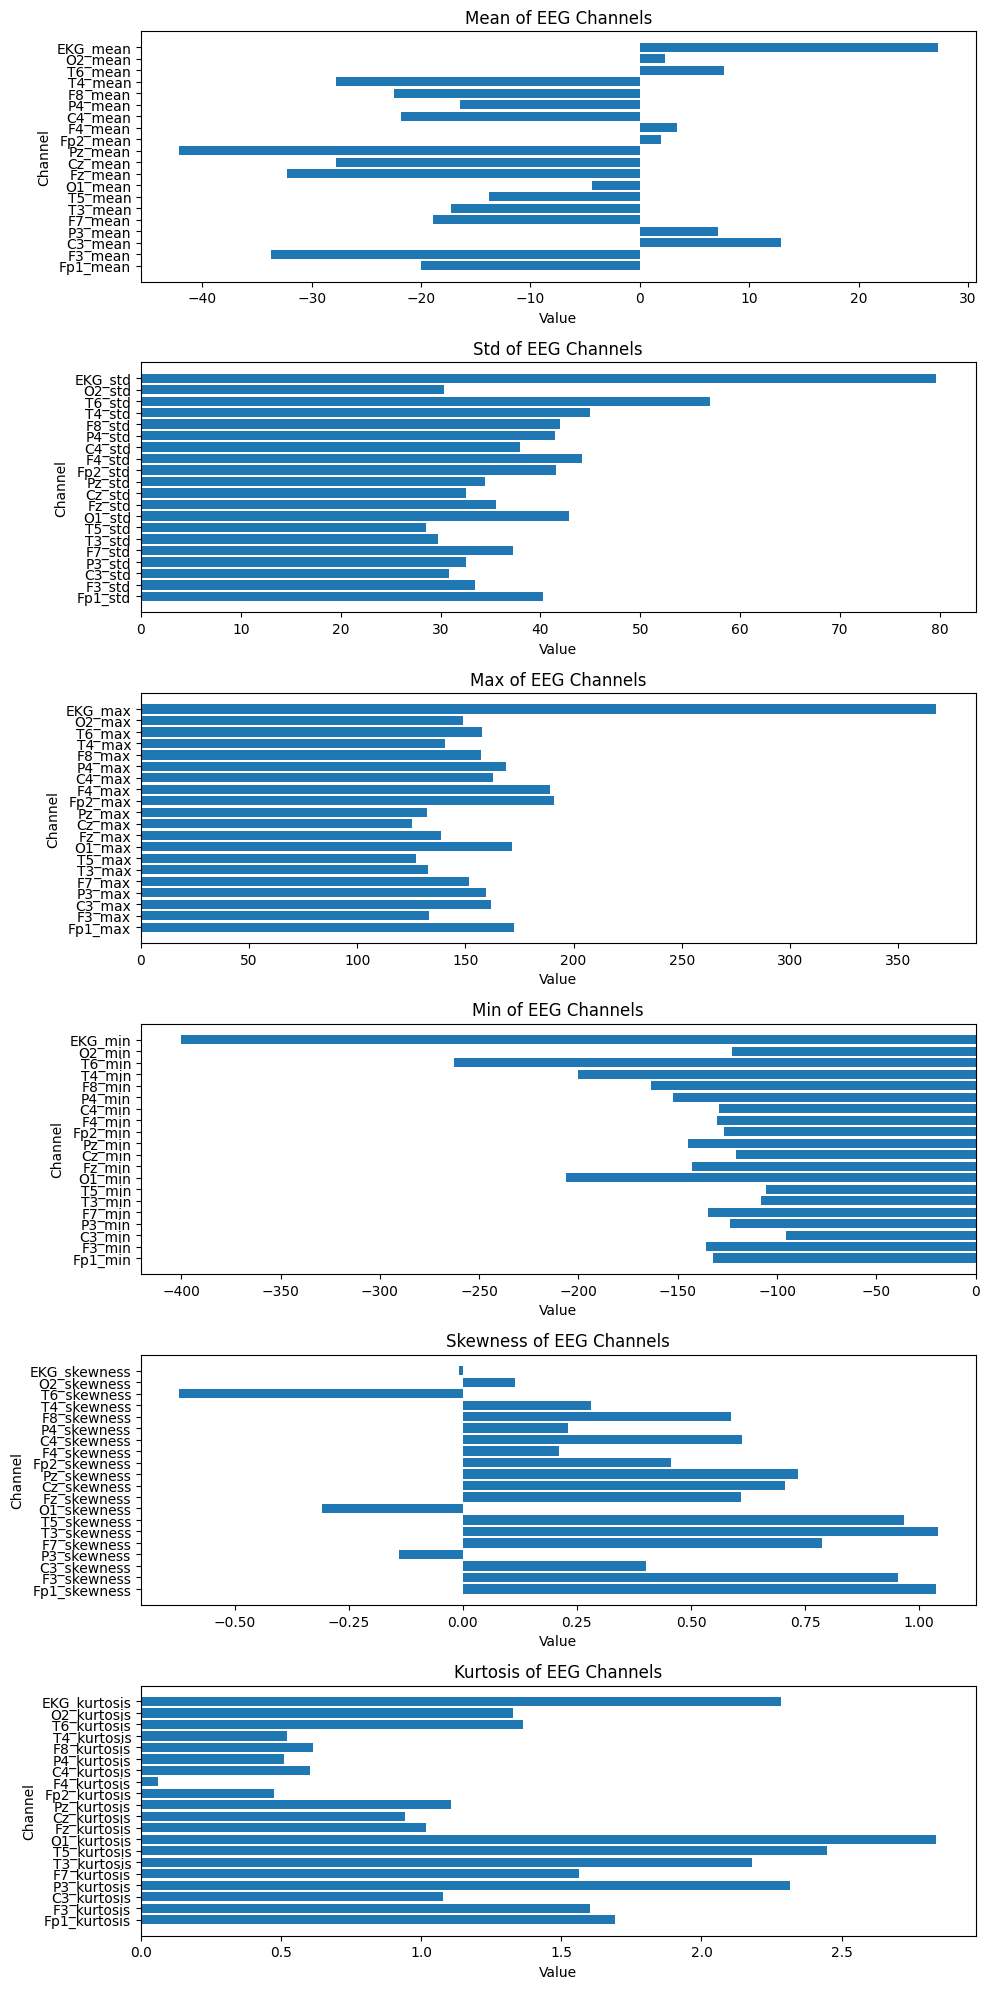

In [16]:
def visualize_features_subplots(features_df):
    flat_data = features_df.T.reset_index()
    flat_data.columns = ['Feature', 'Value']

    feature_types = ['mean', 'std', 'max', 'min', 'skewness', 'kurtosis']
    fig, axes = plt.subplots(nrows=len(feature_types), ncols=1, figsize=(10, 20))

    for i, feature_type in enumerate(feature_types):
        ax = axes[i]
        filtered_data = flat_data[flat_data['Feature'].str.contains(feature_type)]
        ax.barh(filtered_data['Feature'], filtered_data['Value'])
        ax.set_title(f'{feature_type.capitalize()} of EEG Channels')
        ax.set_xlabel('Value')
        ax.set_ylabel('Channel')

    plt.tight_layout()
    plt.show()

visualize_features_subplots(time_domain_features)

In [17]:
import scipy.signal

def find_peaks(data, height=None, distance=None):
    """Identify peaks in the EEG signal."""
    peaks, _ = scipy.signal.find_peaks(data, height=height, distance=distance)
    return peaks

def hjorth_parameters(data):
    """Calculate Hjorth parameters: Activity, Mobility, and Complexity."""
    activity = np.var(data)
    mobility = np.sqrt(np.var(np.diff(data)) / activity)
    complexity = np.sqrt(np.var(np.diff(np.diff(data))) / np.var(np.diff(data))) / mobility
    return activity, mobility, complexity

def calculate_features(eeg_df):
    """
    Calculate peaks and Hjorth parameters for each EEG channel.

    Parameters:
    eeg_df (pandas.DataFrame): DataFrame with each column representing an EEG channel.

    Returns:
    pandas.DataFrame: A single-row DataFrame containing peaks and Hjorth parameters for each channel.
    """
    features = {}

    for column in eeg_df.columns:
        data = eeg_df[column]
        
        # Peak analysis
        peaks = find_peaks(data)
        features[f'{column}_peak_count'] = len(peaks)

        # Hjorth parameters
        activity, mobility, complexity = hjorth_parameters(data)
        features[f'{column}_activity'] = activity
        features[f'{column}_mobility'] = mobility
        features[f'{column}_complexity'] = complexity

    return pd.DataFrame([features])

eeg_features = calculate_features(eeg)
eeg_features

,Fp1_peak_count,Fp1_activity,Fp1_mobility,Fp1_complexity,F3_peak_count,F3_activity,F3_mobility,F3_complexity,C3_peak_count,C3_activity,...,T6_mobility,T6_complexity,O2_peak_count,O2_activity,O2_mobility,O2_complexity,EKG_peak_count,EKG_activity,EKG_mobility,EKG_complexity
0,2766,1621.742676,0.430336,3.520084,2884,1116.832764,0.583026,2.677664,2928,948.538391,...,0.299558,4.987018,2668,919.537109,0.5332,2.807512,2910,6334.615234,0.816427,1.881192


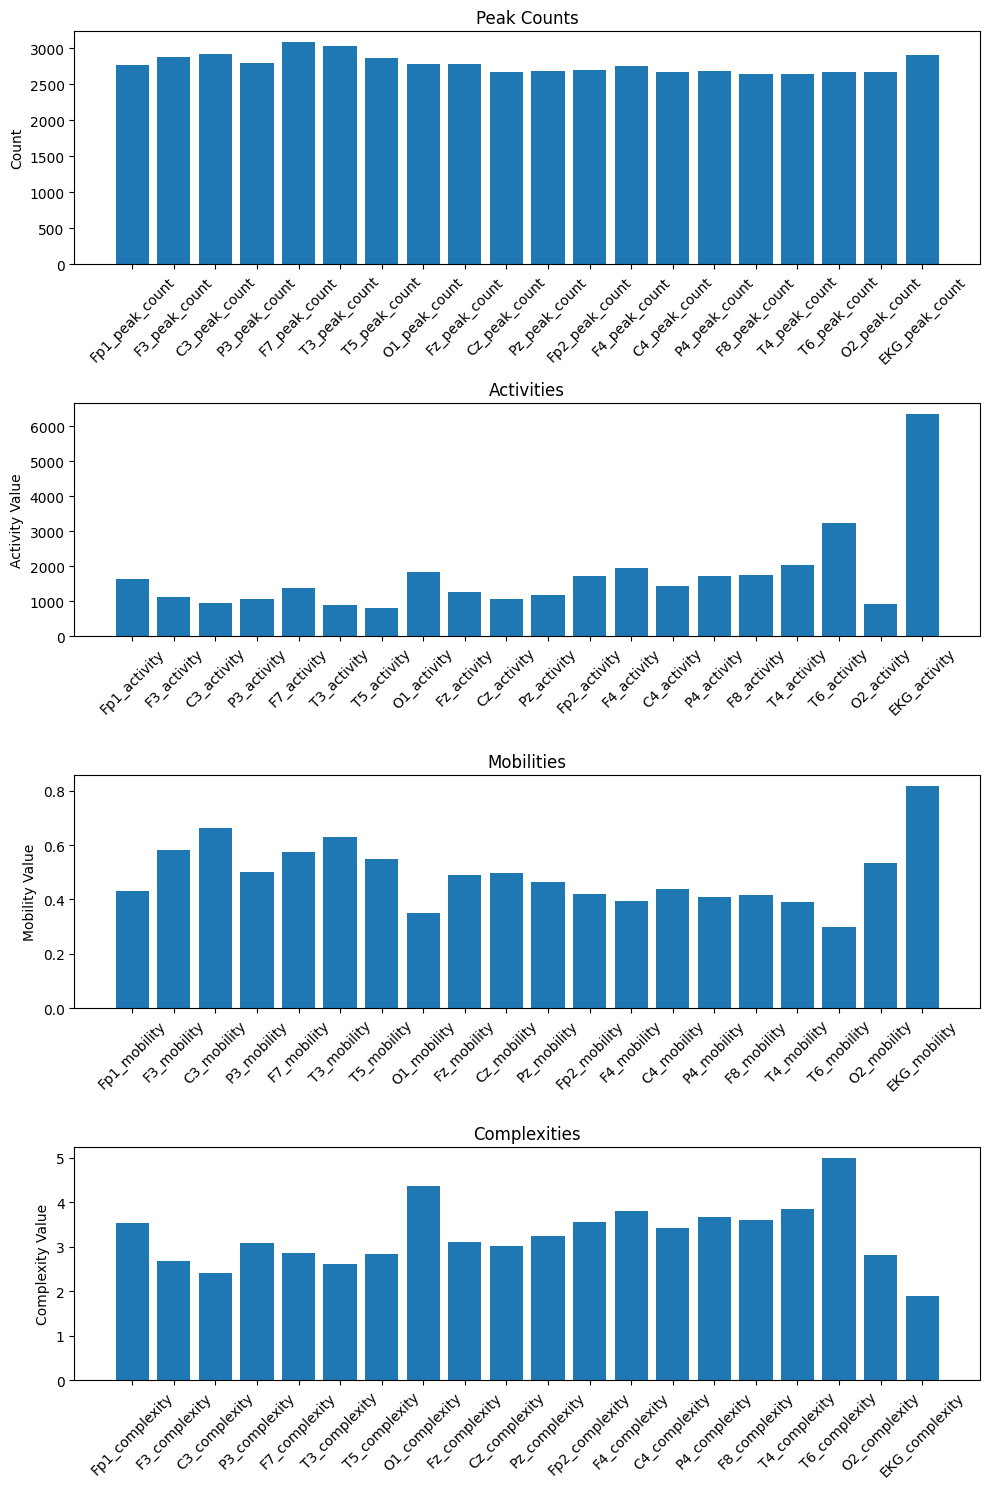

In [18]:
# Plotting
fig, axs = plt.subplots(4, figsize=(10, 15))

# Peak Counts
axs[0].bar(eeg_features.columns[eeg_features.columns.str.contains('peak_count')], eeg_features.iloc[0, eeg_features.columns.str.contains('peak_count')])
axs[0].set_title('Peak Counts')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Activities
axs[1].bar(eeg_features.columns[eeg_features.columns.str.contains('activity')], eeg_features.iloc[0, eeg_features.columns.str.contains('activity')])
axs[1].set_title('Activities')
axs[1].set_ylabel('Activity Value')
axs[1].tick_params(axis='x', rotation=45)

# Mobilities
axs[2].bar(eeg_features.columns[eeg_features.columns.str.contains('mobility')], eeg_features.iloc[0, eeg_features.columns.str.contains('mobility')])
axs[2].set_title('Mobilities')
axs[2].set_ylabel('Mobility Value')
axs[2].tick_params(axis='x', rotation=45)

# Complexities
axs[3].bar(eeg_features.columns[eeg_features.columns.str.contains('complexity')], eeg_features.iloc[0, eeg_features.columns.str.contains('complexity')])
axs[3].set_title('Complexities')
axs[3].set_ylabel('Complexity Value')
axs[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Spectrogram Data**

In [19]:
spectrogram = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/test_spectrograms/853520.parquet')
spectrogram

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,14.910000,17.110001,11.660000,11.73,6.08,4.54,4.31,3.38,2.05,...,0.07,0.06,0.05,0.06,0.05,0.05,0.06,0.05,0.04,0.05
1,3,11.130000,10.950000,10.770000,5.07,4.03,3.24,3.61,2.98,1.54,...,0.05,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.02
2,5,10.880000,10.570000,8.790000,5.33,2.44,1.48,1.83,0.99,0.89,...,0.04,0.04,0.04,0.03,0.03,0.04,0.04,0.05,0.06,0.06
3,7,19.450001,18.200001,17.719999,13.38,4.17,1.88,1.84,1.22,1.27,...,0.03,0.03,0.05,0.08,0.07,0.07,0.08,0.03,0.03,0.03
4,9,21.650000,22.530001,23.160000,17.00,7.19,3.89,3.65,2.72,2.35,...,0.04,0.04,0.05,0.05,0.06,0.05,0.05,0.05,0.04,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,591,15.580000,18.209999,14.020000,15.96,4.36,4.98,2.68,2.22,2.03,...,0.48,0.59,0.59,0.73,0.44,0.41,0.56,0.60,0.61,0.60
296,593,17.209999,20.219999,20.889999,17.16,9.15,4.14,2.49,2.71,1.60,...,0.26,0.37,0.41,0.36,0.48,0.36,0.39,0.46,0.34,0.32
297,595,9.610000,13.320000,9.190000,11.50,8.11,5.53,5.57,3.69,3.19,...,0.58,0.37,0.17,0.14,0.13,0.30,0.36,0.39,0.56,0.29
298,597,8.430000,11.840000,13.640000,10.56,8.63,5.80,2.98,1.48,0.96,...,0.54,0.22,0.17,0.16,0.11,0.38,0.45,0.45,0.45,0.34


In [20]:
def plot_spectrogram(spectrogram_path, colormap='viridis', aspect='auto', label_interval=None):
    try:
        sample_spect = pd.read_parquet(spectrogram_path)
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    split_spect = {
        "LL": sample_spect.filter(regex='^LL', axis=1),
        "RL": sample_spect.filter(regex='^RL', axis=1),
        "RP": sample_spect.filter(regex='^RP', axis=1),
        "LP": sample_spect.filter(regex='^LP', axis=1),
    }
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    axes = axes.flatten()

    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        spect_data = np.log(split_spect[split_name] + 1e-9).T  # Adding a small constant to avoid log(0)
        img = ax.imshow(spect_data, cmap=colormap, aspect=aspect, origin='lower')
        
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)', rotation=270, labelpad=15)
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        if label_interval is None:
            label_interval = max(1, len(frequencies) // 15)  # Dynamic label interval
        ax.set_yticks(np.arange(0, len(frequencies), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])

    plt.tight_layout()
    plt.show()

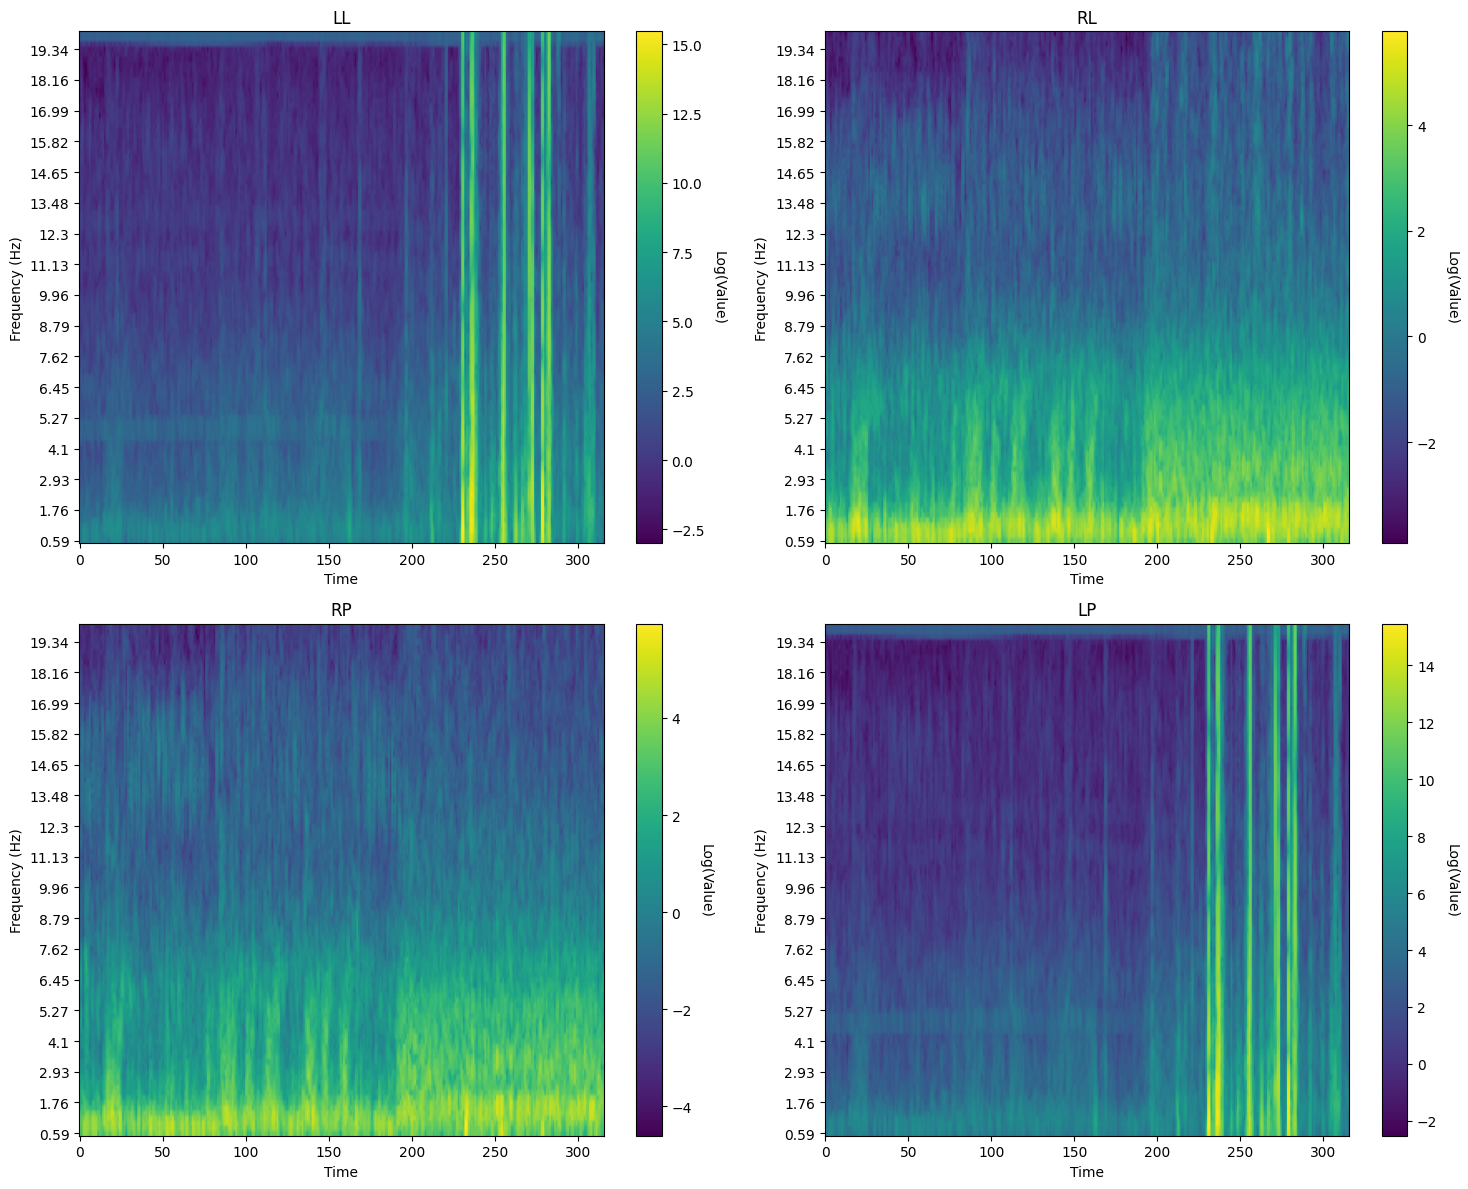

In [21]:
plot_spectrogram("/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/862174834.parquet")